In [1]:
import cv2 as cv
import numpy as np

from IPython.html.widgets import *
from PIL import Image
from matplotlib import pyplot as plt

%matplotlib inline

/usr/local/lib/python3.8/dist-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [2]:
def rotation(degrees):
    plt.rcParams["figure.figsize"] = (15,10)
    with Image.open("./rosenheim.jpeg") as im:
        im = im.rotate(degrees)    
        plt.imshow(im)
        plt.title("Rotation")
        plt.show()

interact(rotation, degrees=(0, 180, 45))

interactive(children=(IntSlider(value=90, description='degrees', max=180, step=45), Output()), _dom_classes=('…

<function __main__.rotation(degrees)>

In [3]:
def brightness(beta):
    plt.rcParams["figure.figsize"] = (15,10)
    image = cv.imread("./rosenheim.jpeg", cv.IMREAD_COLOR)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image_proc = cv.convertScaleAbs(image, alpha=1.0, beta=beta)
    
    plt.imshow(Image.fromarray(image_proc))
    plt.title("Brightness")
    plt.show()
    
interact(brightness, beta=(0, 100, 5))

interactive(children=(IntSlider(value=50, description='beta', step=5), Output()), _dom_classes=('widget-intera…

<function __main__.brightness(beta)>

In [4]:
def contrast(alpha):
    plt.rcParams["figure.figsize"] = (15,10)
    image = cv.imread("./rosenheim.jpeg", cv.IMREAD_COLOR)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image_proc = cv.convertScaleAbs(image, alpha=alpha, beta=0)
    plt.imshow(Image.fromarray(image_proc), plt.get_cmap('gray'))
    plt.title("Contrast")
    plt.show()

interact(contrast, alpha=(1.0, 3.0, 0.5))

interactive(children=(FloatSlider(value=2.0, description='alpha', max=3.0, min=1.0, step=0.5), Output()), _dom…

<function __main__.contrast(alpha)>

In [5]:
def threshold(value):  
    plt.rcParams["figure.figsize"] = (15,10)  
    image = cv.imread("./coins.png", cv.IMREAD_COLOR)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    ret, image_proc = cv.threshold(image, value, 255, cv.THRESH_BINARY)
    plt.imshow(image_proc, plt.get_cmap('gray'))
    plt.title("Threshold")
    plt.show()

interact(threshold, value=(10,255,2))

interactive(children=(IntSlider(value=132, description='value', max=255, min=10, step=2), Output()), _dom_clas…

<function __main__.threshold(value)>

In [6]:
def k_means(num_cluster):
    plt.rcParams["figure.figsize"] = (8, 3)
    image = cv.imread("./rosenheim.jpeg", cv.IMREAD_COLOR)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title("Original")
    plt.show()
    
    image = np.float32(image).reshape(-1, 3)
    _, label, centers = cv.kmeans(image, num_cluster, None, (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 2, 0.002), 10, cv.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    for idx, center in enumerate(centers):
        color = np.zeros((20, 20, 3), np.uint8)
        color[:] = (center[0], center[1], center[2])
        plt.imshow(color)
        plt.title("Color: " + str(idx + 1))
        plt.show()

interact(k_means, num_cluster=(1, 10, 1))

interactive(children=(IntSlider(value=5, description='num_cluster', max=10, min=1), Output()), _dom_classes=('…

<function __main__.k_means(num_cluster)>

In [7]:
def quantization(num_cluster):
    plt.rcParams["figure.figsize"] = (15,10) 
    image = cv.imread("./rosenheim.jpeg", cv.IMREAD_COLOR)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image_proc = np.float32(image).reshape(-1, 3)
    _, label, centers = cv.kmeans(image_proc, num_cluster, None, (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 2, 0.002), 10, cv.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    image_proc = centers[label.flatten()]
    image_proc = image_proc.reshape(image.shape)
    plt.imshow(image_proc)
    plt.title("Quantization")
    plt.show()

interact(quantization, num_cluster=(1, 10, 1))

interactive(children=(IntSlider(value=5, description='num_cluster', max=10, min=1), Output()), _dom_classes=('…

<function __main__.quantization(num_cluster)>

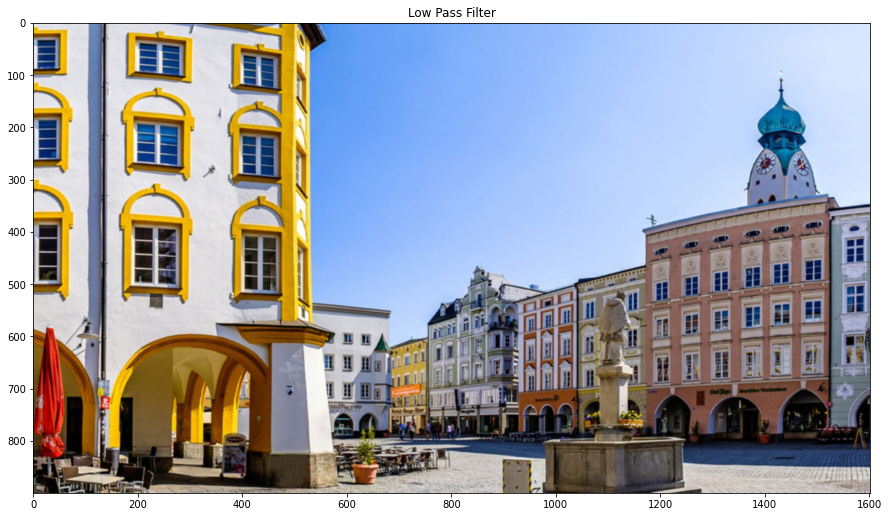

In [8]:
def low_pass_gauss():
    plt.rcParams["figure.figsize"] = (15,10) 
    image = cv.imread("./rosenheim.jpeg", cv.IMREAD_COLOR)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    kernel = np.array([
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]
    ]) / 16
    image = cv.filter2D(src=image, ddepth=-1, kernel=kernel)
    plt.imshow(image)
    plt.title("Low Pass Filter")
    plt.show()
    
low_pass_gauss()

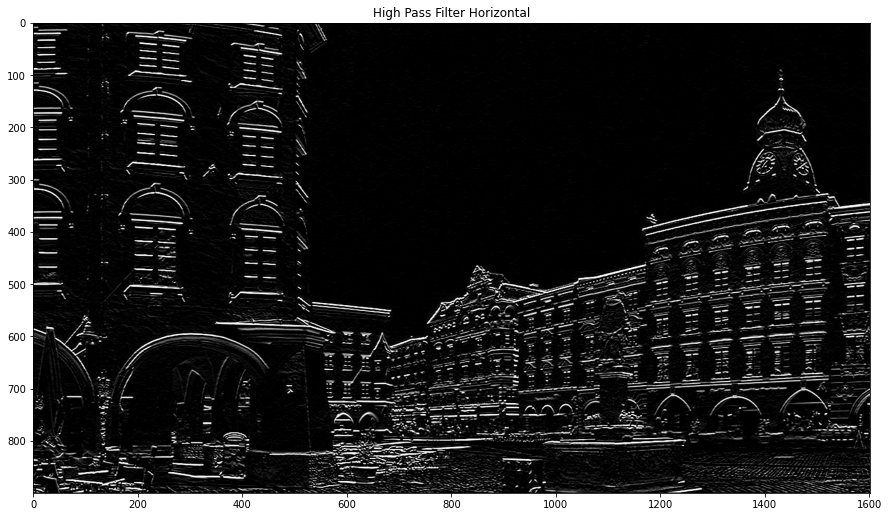

In [9]:
def high_pass_sobel_h():
    plt.rcParams["figure.figsize"] = (15,10) 
    image = cv.imread("./rosenheim.jpeg", cv.IMREAD_COLOR)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    kernel = np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ])
    image = cv.filter2D(src=image, ddepth=-1, kernel=kernel)
    plt.imshow(image, cmap="gray")
    plt.title("High Pass Filter Horizontal")
    plt.show() 

high_pass_sobel_h()

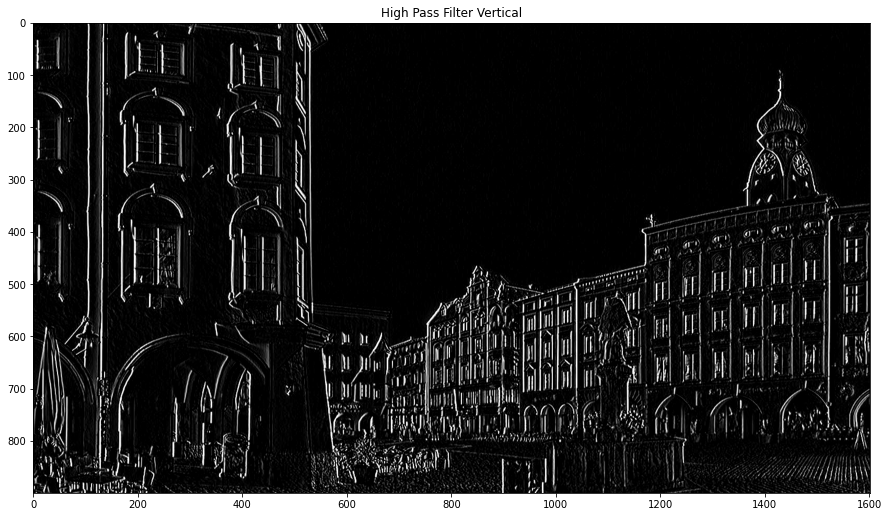

In [10]:
def high_pass_sobel_v():
    plt.rcParams["figure.figsize"] = (15,10) 
    image = cv.imread("./rosenheim.jpeg", cv.IMREAD_COLOR)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    kernel = np.array([
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ])
    image = cv.filter2D(src=image, ddepth=-1, kernel=kernel)
    plt.imshow(image, cmap="gray")
    plt.title("High Pass Filter Vertical")
    plt.show() 
    
high_pass_sobel_v()

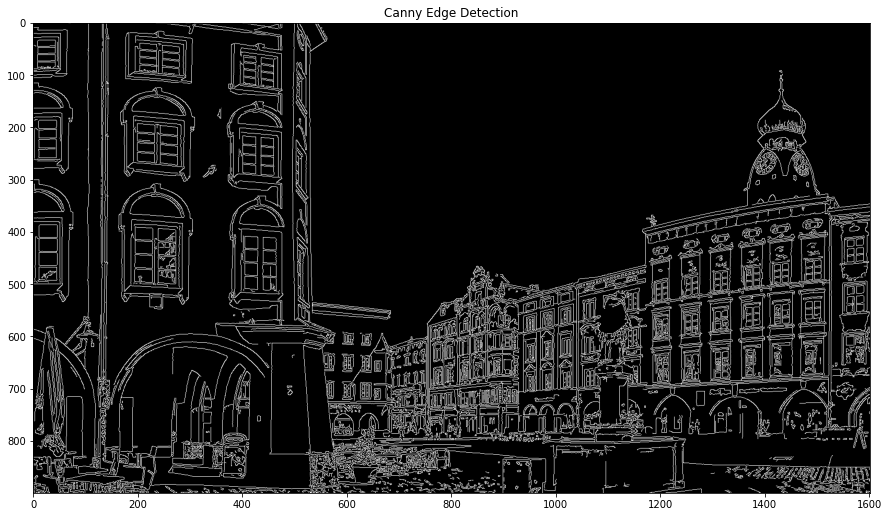

In [11]:
def canny():
    plt.rcParams["figure.figsize"] = (15,10) 
    image = cv.imread("./rosenheim.jpeg", cv.IMREAD_COLOR)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    image = cv.Canny(image, 100, 200)
    plt.imshow(image, cmap="gray")
    plt.title("Canny Edge Detection")
    plt.show()
    
canny()

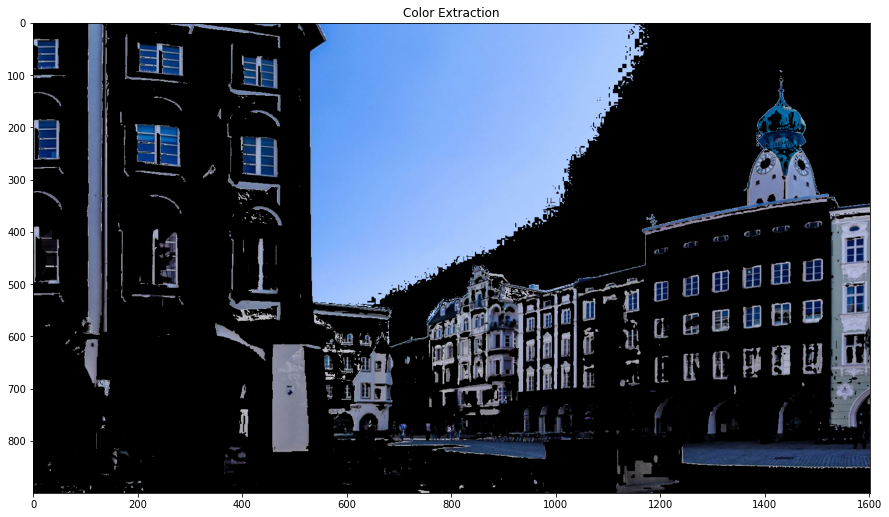

In [12]:
def color_extraction():
    plt.rcParams["figure.figsize"] = (15,10) 
    image = cv.imread("./rosenheim.jpeg", cv.IMREAD_COLOR)
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    _, image_thresh = cv.threshold(image_gray, 200, 205, cv.THRESH_BINARY_INV)
    image = cv.bitwise_and(image, image, mask=image_thresh)
    image_hsv = cv.cvtColor(image.copy(), cv.COLOR_BGR2HSV)
    
    lower_red = np.array([0,0,50])
    upper_red = np.array([10,255,255])
    image_mask_red = cv.inRange(image_hsv, lower_red, upper_red)
    
    
    lower_blue = np.array([100,0,0])
    upper_blue = np.array([140,255,255])
    image_mask_blue = cv.inRange(image_hsv, lower_blue, upper_blue)
    
    image = cv.bitwise_and(image, image, mask=image_mask_blue)
    image = cv.cvtColor(image.copy(), cv.COLOR_BGR2RGB)
    
    plt.imshow(image, cmap="gray")
    plt.title("Color Extraction")
    plt.show()
    
color_extraction()

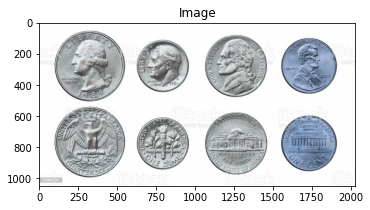

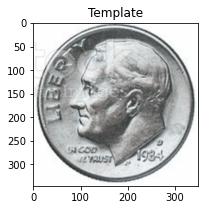

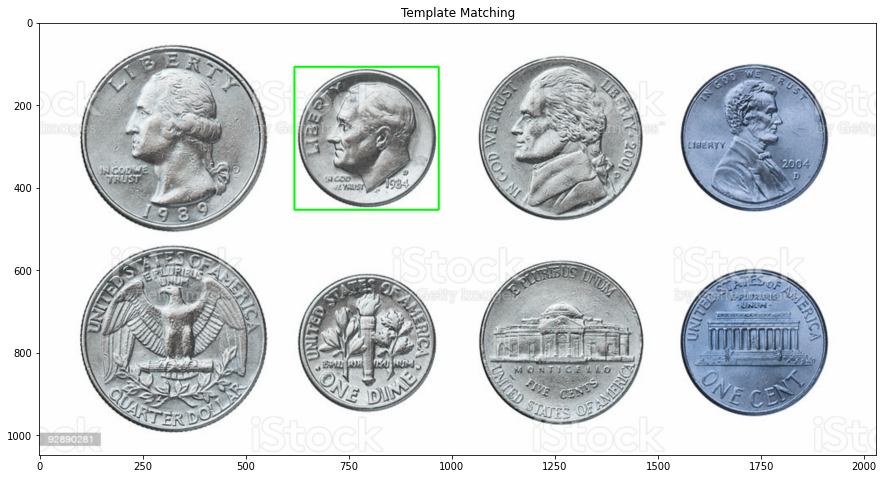

In [13]:
def match_template():
    plt.rcParams["figure.figsize"] = (8, 3)
    image = cv.imread("./coins.png", cv.IMREAD_COLOR)
    template = cv.imread("./coins_template.png", cv.IMREAD_COLOR)
    plt.imshow(image)
    plt.title("Image")
    plt.show()
    plt.imshow(template)
    plt.title("Template")
    plt.show()
    plt.rcParams["figure.figsize"] = (15,10)
    matches = cv.matchTemplate(image, template, cv.TM_CCOEFF_NORMED)
    matches = np.where(matches >= 0.9)
    matches = list(zip(map(int, matches[1]), map(int, matches[0])))
    h, w = template.shape[:2]
    match = matches[0]
    cv.rectangle(image, (match[0], match[1]), (match[0] + w, match[1] + h), (0, 255, 0), 3)
    plt.imshow(image)
    plt.title("Template Matching")
    plt.show()
    
match_template()

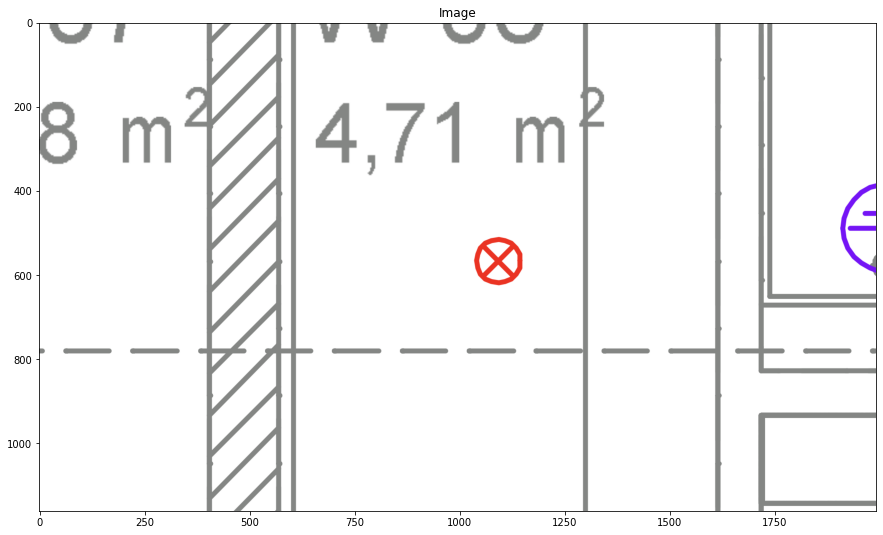

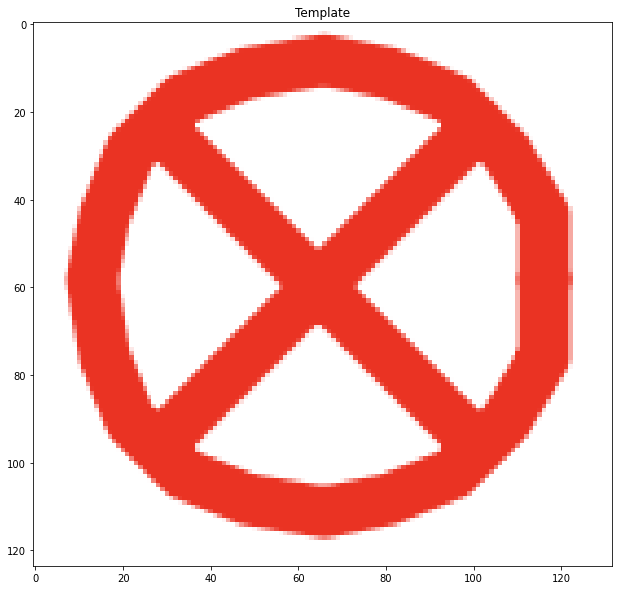

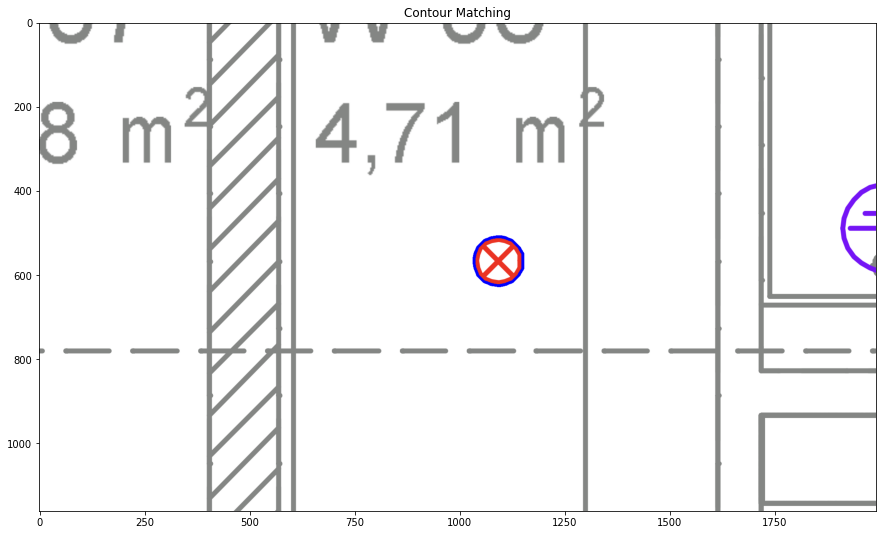

In [14]:
def match_contours():
    template = cv.imread("./plan_template.png", cv.IMREAD_COLOR)
    image = cv.imread("./plan.png", cv.IMREAD_COLOR)
    
    template = cv.cvtColor(template, cv.COLOR_BGR2RGB)
    template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    _, template_gray = cv.threshold(template_gray, 200, 255, 0)
    
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    _, image_gray = cv.threshold(image_gray, 200, 255, 0)
    
    contours_template_gray, hierarchy_template_gray = cv.findContours(template_gray, cv.RETR_TREE, cv.CHAIN_APPROX_TC89_L1)
    contours_image_gray, hierarchy_image_gray = cv.findContours(image_gray, cv.RETR_TREE, cv.CHAIN_APPROX_TC89_L1)
 
    matches = []
    
    plt.imshow(image)
    plt.title("Image")
    plt.show()
    plt.imshow(template)
    plt.title("Template")
    plt.show()

    if len(contours_template_gray) >= 2:
        for i in range(0, len(contours_image_gray) - 1):
            ret = cv.matchShapes(contours_image_gray[i], contours_template_gray[1], cv.CONTOURS_MATCH_I2, 0)
            if ret < 0.5:
                if len(contours_template_gray) > 2 and hierarchy_image_gray[0][i + 1][3] == i:
                    ret2 = cv.matchShapes(contours_image_gray[i + 1], contours_template_gray[2], cv.CONTOURS_MATCH_I2, 0)
                    if ret2 < 0.5:
                        cnt = contours_image_gray[i]
                        cv.drawContours(image, [cnt], 0, (0,0,255), 6)
                elif len(contours_template_gray) == 2:
                        cnt = contours_image_gray[i]
                        cv.drawContours(image, [cnt], 0, (0,0,255), 6)

    if len(contours_template_gray) == 1:
        for i in range(0, len(contours_image_gray)):
            ret = cv.matchShapes(contours_image_gray[i], contours_template_gray[0], cv.CONTOURS_MATCH_I2, 0)
            if ret < 0.5:
                cnt = contours_image_gray[i]
                cv.drawContours(image, [cnt], 0, (0,0,255), 6)
    
    plt.imshow(image)
    plt.title("Contour Matching")
    plt.show()
    
match_contours()

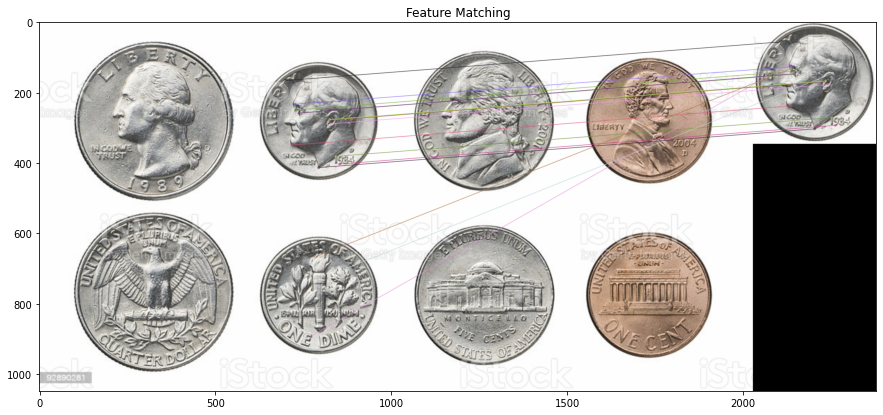

In [16]:
def feature_matching():
    detector = cv.ORB_create(scaleFactor=1.5, edgeThreshold=20, fastThreshold=20)
    #detector = cv.KAZE_create()
    matcher = cv.BFMatcher()
    
    image = cv.imread("./coins.png", cv.IMREAD_COLOR)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    template = cv.imread("./coins_template.png", cv.IMREAD_COLOR)
    template = cv.cvtColor(template, cv.COLOR_BGR2RGB)
 
    image_keypoints, image_descriptors = detector.detectAndCompute(image, None)
    template_keypoints, template_descriptors = detector.detectAndCompute(template, None)
    
    matches = matcher.knnMatch(image_descriptors, template_descriptors, k=2)
    
    best_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            best_matches.append([m])
 
    result_image = cv.drawMatchesKnn(image, image_keypoints, template, template_keypoints, best_matches[1:50], None, flags=2)
    plt.imshow(result_image)
    plt.title("Feature Matching")
    plt.show()

feature_matching()